<a href="https://colab.research.google.com/github/larissavvsous/ProjectsColab/blob/main/previsao_AVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>  Disciplina: Análise de Regressão I
## <center> Aluna: Larissa Sousa

---

## Serão empregados os modelos de Regressão Logística e Random Forest para uma análise comparativa de desempenho na resolução de um problema de classificação binária, onde o objetivo é prever a ocorrência de AVC (Acidente Vascular Cerebral) ou não. Os dados são:

1. o gênero da pessoa
  - Feminino: 0
  - Masculino: 1
2. a idade da pessoa
3. se possui ou não hipertensão
  - Não: 0
  - Sim: 1
4. se possui ou não doença cardíaca
  - Não: 0
  - Sim: 1
5. condição de fumante
  - Fumava antes: 0
  - Nunca fumou: 1
  - Fuma: 2
  - Desconhecido: 3
6. o tipo de trabalho
  - Privado: 0
  - Autônomo: 1
  - Criança: 2
  - Trabalho governo: 3
  - Nunca trabalhou: 4
7. o tipo de residência
  - Rural: 0
  - Urbano: 1
  - Criança: 2
  - Trabalho governo: 3
  - Nunca trabalhou: 4
8. o nível médio de glicose
9. o IMC
10. e a coluna alvo AVC
  - Não: 0
  - Sim: 1

## Já tratados e codificados em outro estudo.

## Vamos usar sete preditores: gênero, idade, hipertensao, doenca_cardiaca, nivel_medio_glicose, condicao_fumante e IMC.


<center> O modelo de Regressão Logística terá essa configuração:
<center> $P(AVC)=\frac{1}{1+e^{-\beta_0 + \beta_1 \times gênero + \beta_2 \times idade +...+ \beta_6 \times IMC}}$



### Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE

### Dataset

In [2]:
df = pd.read_csv('/content/df_reg.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,id,genero,idade,hipertensao,doenca_cardiaca,tipo_trabalho,tipo_residencia,nivel_medio_glicose,IMC,condicao_fumante,AVC
0,9046,1,67.0,0,1,3,1,228.69,36.6,2,1
1,31112,1,80.0,0,1,3,0,105.92,32.5,3,1
2,60182,0,49.0,0,0,3,1,171.23,34.4,1,1
3,1665,0,79.0,1,0,0,0,174.12,24.0,3,1
4,56669,1,81.0,0,0,3,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,14180,0,13.0,0,0,1,0,103.08,18.6,0,0
4904,44873,0,81.0,0,0,0,1,125.20,40.0,3,0
4905,19723,0,35.0,0,0,0,0,82.99,30.6,3,0
4906,37544,1,51.0,0,0,3,0,166.29,25.6,2,0


In [3]:
df.describe()

,id,genero,idade,hipertensao,doenca_cardiaca,tipo_trabalho,tipo_residencia,nivel_medio_glicose,IMC,condicao_fumante,AVC
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,37059.525876,0.410147,42.869829,0.091891,0.049511,2.376732,0.507335,105.315375,28.894682,1.622657,0.042584
std,20994.557504,0.492324,22.555253,0.288901,0.216954,1.308718,0.499997,44.423089,7.854214,1.262489,0.201937
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000,0.000000
25%,18602.500000,0.000000,25.000000,0.000000,0.000000,1.000000,0.000000,77.077500,23.500000,0.000000,0.000000
50%,37580.500000,0.000000,44.000000,0.000000,0.000000,3.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,55181.750000,1.000000,60.000000,0.000000,0.000000,3.000000,1.000000,113.585000,33.100000,3.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


### Verificando valores ausentes

In [4]:
df.isna().sum()

id                     0
genero                 0
idade                  0
hipertensao            0
doenca_cardiaca        0
tipo_trabalho          0
tipo_residencia        0
nivel_medio_glicose    0
IMC                    0
condicao_fumante       0
AVC                    0
dtype: int64

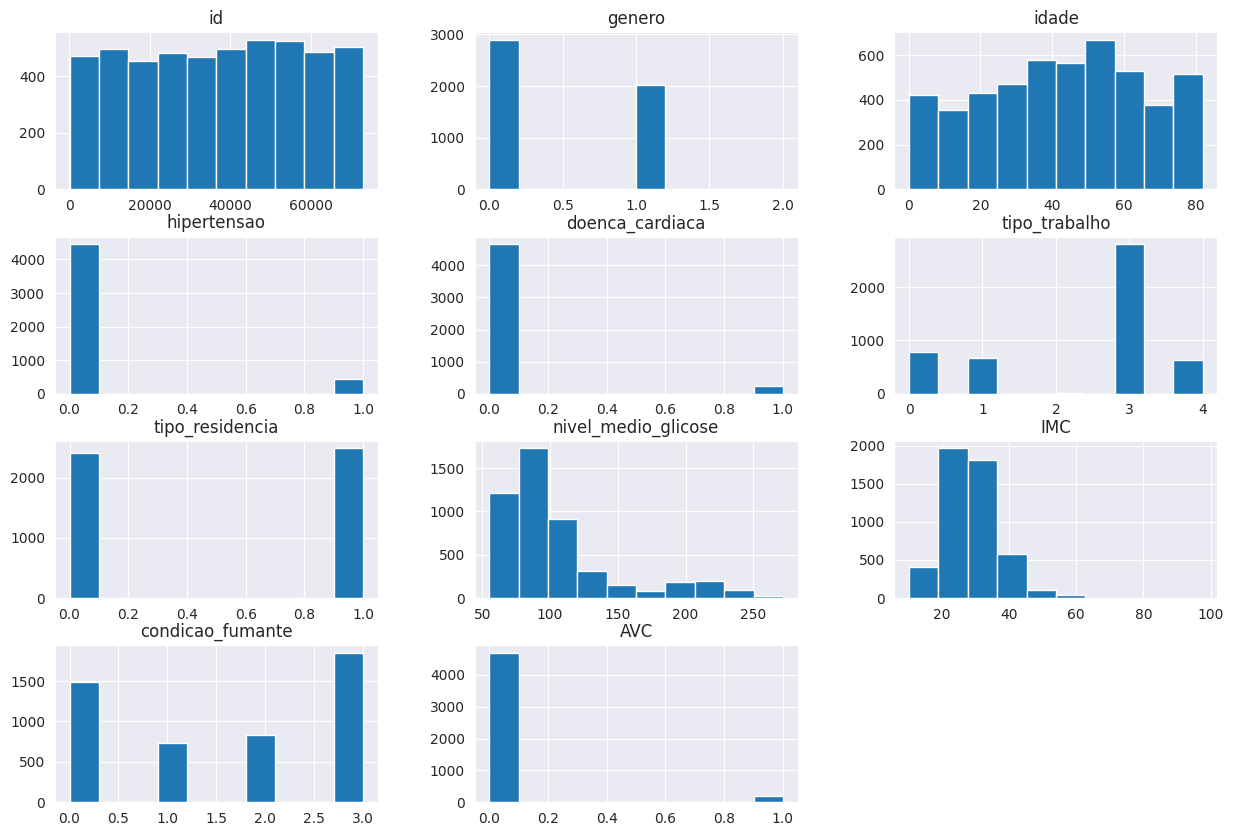

In [5]:
sns.set_style('darkgrid')
df.hist(figsize=(15,10))
plt.show()

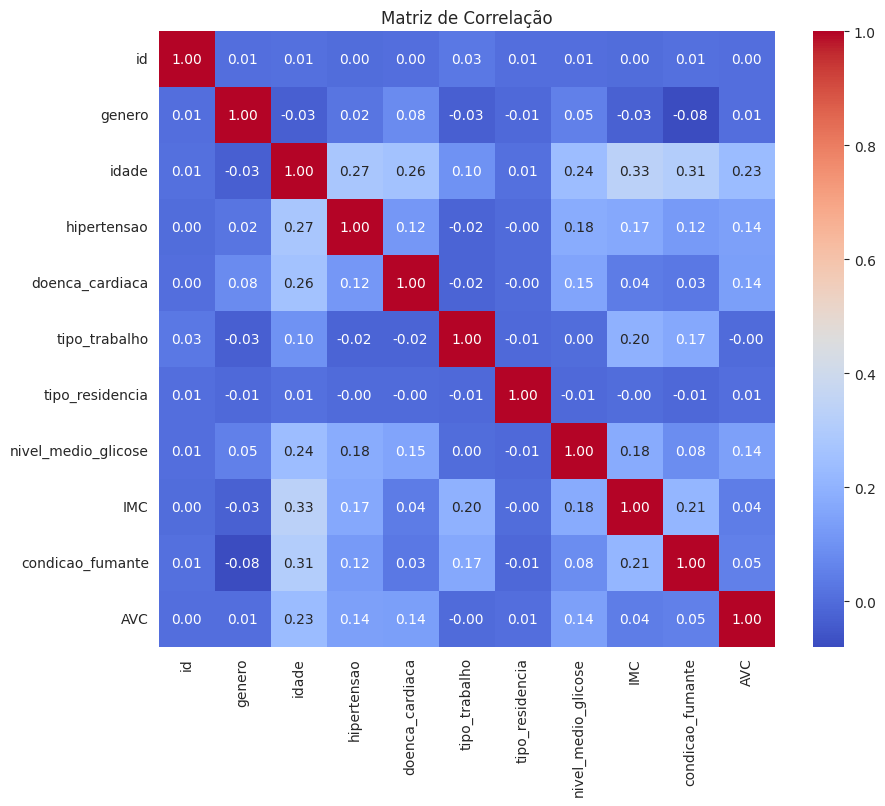

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlação")
plt.show()

In [7]:
df['AVC'].value_counts()

0    4699
1     209
Name: AVC, dtype: int64

In [8]:
df['AVC'].value_counts(normalize=True)

0    0.957416
1    0.042584
Name: AVC, dtype: float64

### Se a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.

### Normalizando colunas

In [9]:
col_normalizar = ['genero', 'idade', 'hipertensao', 'doenca_cardiaca', 'condicao_fumante','tipo_trabalho', 'tipo_residencia', 'nivel_medio_glicose', 'IMC', 'AVC']

scaler = MinMaxScaler()

df[col_normalizar] = scaler.fit_transform(df[col_normalizar])
df.head()

,id,genero,idade,hipertensao,doenca_cardiaca,tipo_trabalho,tipo_residencia,nivel_medio_glicose,IMC,condicao_fumante,AVC
0,9046,0.5,0.816895,0.0,1.0,0.75,1.0,0.801173,0.301260,0.666667,1.0
1,31112,0.5,0.975586,0.0,1.0,0.75,0.0,0.234159,0.254296,1.000000,1.0
2,60182,0.0,0.597168,0.0,0.0,0.75,1.0,0.535793,0.276060,0.333333,1.0
3,1665,0.0,0.963379,1.0,0.0,0.00,0.0,0.549141,0.156930,1.000000,1.0
4,56669,0.5,0.987793,0.0,0.0,0.75,1.0,0.604979,0.214204,0.666667,1.0


### Verificando se a amostra está balanceada

<Axes: xlabel='AVC', ylabel='count'>

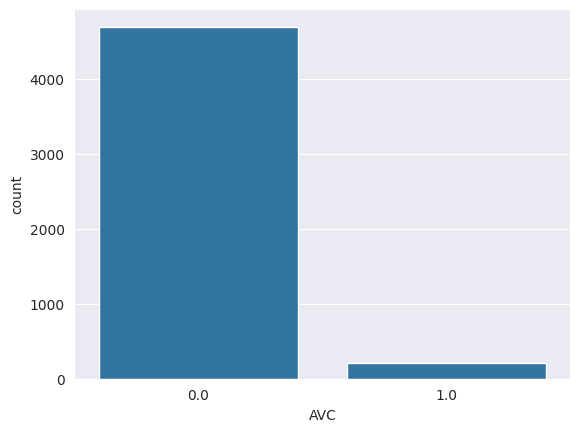

In [10]:
sns.countplot(x='AVC', data=df)

In [11]:
contagem = df['AVC'].value_counts()
print('Classe 0 =', contagem[0])
print('Classe 1 =', contagem[1])

Classe 0 = 4699
Classe 1 = 209


#### Não está, então vamos balancear as classes usando `SMOTE`

### Modelo: Regressão Logística

In [12]:
X = df[['genero', 'idade', 'hipertensao', 'doenca_cardiaca', 'nivel_medio_glicose', 'condicao_fumante', 'IMC']]
y = df['AVC']

smote = SMOTE(random_state=32)
X_smote_res, y_smote_res = smote.fit_resample(X, y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_res, y_smote_res, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0)

clf.fit(X_train_smote, y_train_smote)

y_pred_rl = clf.predict(X_test_smote)

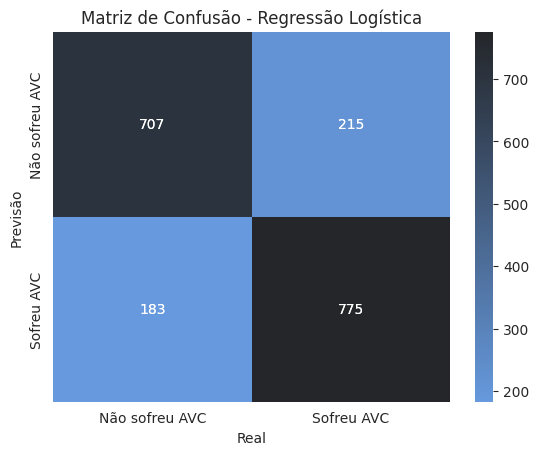

In [13]:
matriz_confusao_rl = confusion_matrix(y_test_smote, y_pred_rl)

cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

sns.heatmap(matriz_confusao_rl, annot=True, fmt='d', cmap=cmap,
            xticklabels=['Não sofreu AVC', 'Sofreu AVC'], yticklabels=['Não sofreu AVC', 'Sofreu AVC'])

plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Matriz de Confusão - Regressão Logística')

for i in range(len(matriz_confusao_rl)):
    for j in range(len(matriz_confusao_rl[i])):
        plt.text(j + 0.5, i + 0.5, f"{matriz_confusao_rl[i][j]}", color = 'white', ha='center', va='center')
plt.show()

In [14]:
print('MODELO REGRESSÃO LOGÍSTICA:\n')
print(f'\nAcurácia: {accuracy_score(y_test_smote, y_pred_rl)}')
print(f'\nClassification report:\n{classification_report(y_test_smote, y_pred_rl, labels=[0, 1])}')
print(f'\nF1 score (média harmônica da Precisão e do Recall)\n {f1_score(y_test_smote, y_pred_rl)}')
print(f'\nPrecisão (Qual a proporção de predições positivas que estavam realmente corretas?)\n {precision_score(y_test_smote, y_pred_rl)}')
print(f'\n Recall (Qual a proporção de valores positivos que foi identificada corretamente?)\n {recall_score(y_test_smote, y_pred_rl)}')
print("\nMatriz de confusão:\n", matriz_confusao_rl)

MODELO REGRESSÃO LOGÍSTICA:


Acurácia: 0.7882978723404256

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       922
           1       0.78      0.81      0.80       958

    accuracy                           0.79      1880
   macro avg       0.79      0.79      0.79      1880
weighted avg       0.79      0.79      0.79      1880


F1 score (média harmônica da Precisão e do Recall)
 0.7956878850102669

Precisão (Qual a proporção de predições positivas que estavam realmente corretas?)
 0.7828282828282829

 Recall (Qual a proporção de valores positivos que foi identificada corretamente?)
 0.8089770354906054

Matriz de confusão:
 [[707 215]
 [183 775]]


#### Teste Regressão Logística

In [15]:
teste_rl = {'genero': 1, 'idade': 40, 'hipertensao': 1, 'doenca_cardiaca': 0, 'nivel_medio_glicose': 200.31, 'condicao_fumante': 0, 'IMC': 27.2}
df_test = pd.DataFrame(data = teste_rl,index=[0])
resultado_rl = clf.predict(df_test)
resultado_rl

array([1.])

In [16]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_res, y_smote_res, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=0)

clf_rf.fit(X_train_smote, y_train_smote)

y_pred_rf = clf_rf.predict(X_test_smote)

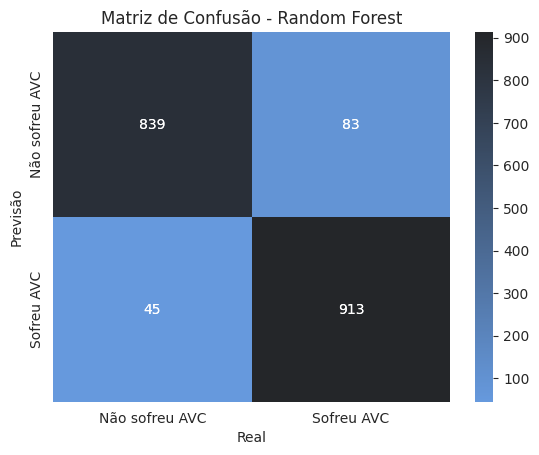

In [17]:
matriz_confusao_rf = confusion_matrix(y_test_smote, y_pred_rf)

cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)

sns.heatmap(matriz_confusao_rf, annot=True, fmt='d',
            xticklabels=['Não sofreu AVC', 'Sofreu AVC'], yticklabels=['Não sofreu AVC', 'Sofreu AVC'],
            cmap=cmap)

plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Matriz de Confusão - Random Forest')

for i in range(len(matriz_confusao_rf)):
    for j in range(len(matriz_confusao_rf[i])):
        plt.text(j + 0.5, i + 0.5, f"{matriz_confusao_rf[i][j]}", color = 'white', ha='center', va='center')
plt.show()

In [18]:
print('MODELO RANDOM FOREST:\n')
print(f'\nAcurácia: {accuracy_score(y_test_smote, y_pred_rf)}')
print(f'\nClassification report:\n{classification_report(y_test_smote, y_pred_rf, labels=[0, 1])}')
print(f'\nF1 score (média harmônica da Precisão e do Recall)\n {f1_score(y_test_smote, y_pred_rf)}')
print(f'\nPrecisão (Qual a proporção de predições positivas que estavam realmente corretas?)\n {precision_score(y_test_smote, y_pred_rf)}')
print(f'\n Recall (Qual a proporção de valores positivos que foi identificada corretamente?)\n {recall_score(y_test_smote, y_pred_rf)}')
print("\nMatriz de confusão:\n", matriz_confusao_rf)

MODELO RANDOM FOREST:


Acurácia: 0.9319148936170213

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       922
           1       0.92      0.95      0.93       958

    accuracy                           0.93      1880
   macro avg       0.93      0.93      0.93      1880
weighted avg       0.93      0.93      0.93      1880


F1 score (média harmônica da Precisão e do Recall)
 0.9344933469805526

Precisão (Qual a proporção de predições positivas que estavam realmente corretas?)
 0.9166666666666666

 Recall (Qual a proporção de valores positivos que foi identificada corretamente?)
 0.9530271398747391

Matriz de confusão:
 [[839  83]
 [ 45 913]]


#### Teste Regressão Logística

In [19]:
teste_rf = {'genero': 1,'idade': 40, 'hipertensao': 1, 'doenca_cardiaca': 0, 'nivel_medio_glicose': 200.31, 'condicao_fumante': 0, 'IMC': 27.2}
df_test_rf = pd.DataFrame(data = teste_rf, index=[0])
resultado_rf = clf.predict(df_test_rf)
resultado_rf

array([1.])

#### Os resultados indicam que o modelo Random Forest superou o modelo de Regressão Logística, apresentando uma acurácia mais alta e um desempenho melhor em termos de precisão (proporção de predições positivas que estavam realmente corretas) e recall (proporção de valores positivos que foram identificados corretamente).

#### Ambos os modelos previram que esse indivíduo tem uma alta probabilidade de sofrer um AVC, representado pelo valor 1.
